In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow==2.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 35.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

In [1]:
import tensorflow as tf
print(tf.__version__)  # Should output: 2.10.0


2.10.0


1/1 [==============================] - 1s 1s/step


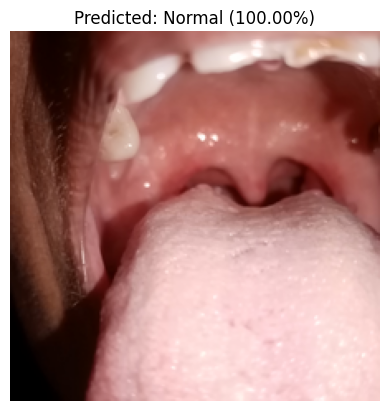

Class: Normal
Confidence Score: 100.00000%


In [3]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# File paths
model_path = '/content/drive/MyDrive/Colab Notebooks/Phar/Final/pharyngitis_model_mobilenetv2.h5'
image_path = '/content/drive/MyDrive/testimages/Normal/IMG_20241123_143749.jpg'

# Load the model
model = load_model(model_path, compile=False)

# Define the class names
class_names = ["Normal", "Moderate", "Tonsillitis"]

# Prepare input image
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image = Image.open(image_path).convert("RGB")
image = ImageOps.fit(image, (224, 224), Image.Resampling.LANCZOS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
data[0] = normalized_image_array

# Predict
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Display Image and Prediction
plt.imshow(image)
plt.title(f"Predicted: {class_name} ({confidence_score * 100:.2f}%)")
plt.axis('off')  # Hide axes
plt.show()

print("Class:", class_name)
print("Confidence Score: {:.5f}%".format(confidence_score * 100))
